In [2]:
import os
import argparse
import sys
import json
import pandas as pd
import numpy as np
import nltk
import time
from sklearn.metrics import confusion_matrix
from nltk import word_tokenize
from pandas.core.indexes.base import Index
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
import random
#import somef
import seaborn as sns
#from imblearn.over_sampling import SMOTE

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ciuciu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Binary classification corrected

In [3]:
df_train = pd.read_csv('dataset/train.csv', sep=';')
df_train_x = df_train['Text']
for i in range(len(df_train_x)):
    df_train_x[i] = df_train_x[i].replace('\n', ' ').replace(',', ' ').lower()
df_train_y = df_train['Label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.30, random_state=42, stratify=df_train_y)

In [5]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x7f3482069c10>)),
                ('classifier', LinearSVC(random_state=42))])

In [6]:
y_pred = clf.predict(y_test)

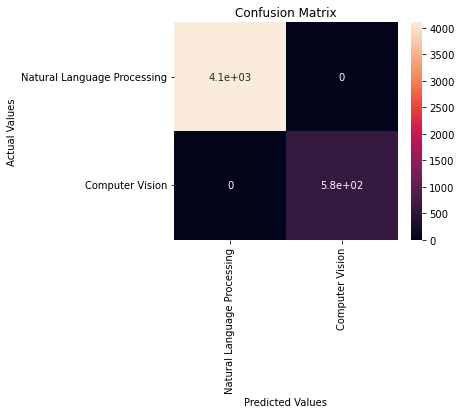

Accuracy :  1.0


In [7]:
cm = confusion_matrix(y_test, y_pred)
y_unique = y_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_unique], 
                     columns = [y_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

In [8]:
x = random.randrange(0, 1000)
print(x)
X = X_test.iloc[[x]]
#print(X)
y = y_test.iloc[x]
y_pred  = clf.predict(X)
print(y, y_pred[0])

206
Computer Vision Computer Vision


In [9]:
df_train_all = pd.read_csv('dataset/train_all.csv', sep=';')
df_train_all_x = df_train_all['Text']
for i in range(len(df_train_all_x)):
    df_train_all_x[i] = df_train_all_x[i].replace('\n', ' ').replace(',', ' ').lower()
df_train_all_y = df_train_all['Label']
print(df_train_all.shape)

(25828, 3)


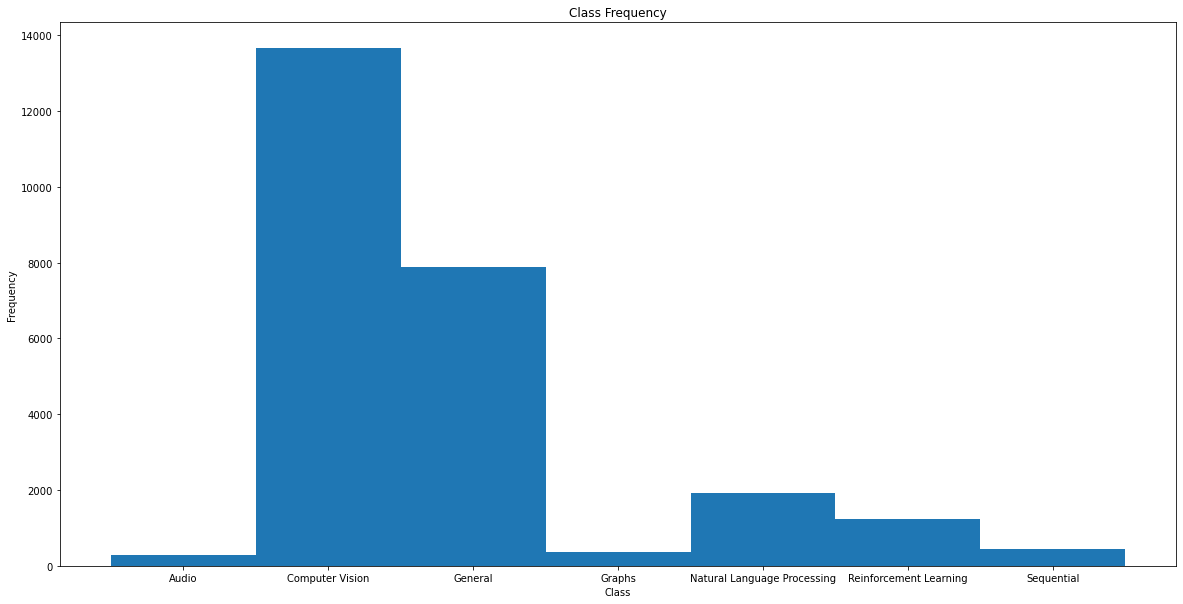

In [10]:
unique, counts = np.unique(df_train_all_y, return_counts=True)
plt.figure(figsize=(20,10))
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [11]:
unique, counts = np.unique(df_train_all_y, return_counts=True)
print(unique)
print(counts)

['Audio' 'Computer Vision' 'General' 'Graphs'
 'Natural Language Processing' 'Reinforcement Learning' 'Sequential']
[  286 13664  7896   363  1928  1237   454]


# Nice version

In [12]:
class DataframeContainer:
    def __init__(self, name):
        self.name = name
        self.dataframe = pd.read_csv('dataset/train_all.csv', sep=';')
        
    def filter_dataframe(self):
        count = 0
        for ind, row in self.dataframe.iterrows():
            if self.name != str(row['Label']):
                count += 1
                row['Label'] = 'Other'
                row['Text'] = row['Text'].replace('\n', ' ').replace(',', ' ').lower()
        print(f'{self.name} filtered {count} rows')  

    def separate_x_y(self):
        self.df_X, self.df_y = self.dataframe['Text'], self.dataframe['Label']
        unique, counts = np.unique(self.df_y , return_counts=True)
        plt.bar(unique, counts, 1)
        plt.title('Class Frequency')
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.show()
        
    def split_train_test(self, test_size = 0.3, random_state = 42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.df_X, self.df_y, test_size=test_size, random_state=random_state, stratify=self.df_y)

    def clf_fit(self):
        self.clf = Pipeline([
            ('vectorizer', CountVectorizer(analyzer="word",
                                           tokenizer=word_tokenize,
                                           max_features=None,
                                           lowercase=True)),
            #('smote', SMOTE(random_state=42)),
            ('classifier', LinearSVC(random_state=42))
        ])
        self.clf.fit(self.X_train, self.y_train)
        print(f'{self.name} clf fit done')
        
    def predict(self):
        self.y_pred = self.clf.predict(self.X_test)

    def confusion_matrix(self):
        y_unique = self.y_test.unique()
        cm = confusion_matrix(self.y_test, self.y_pred, labels=y_unique)
        cm_df = pd.DataFrame(cm, index = [y_unique], columns = [y_unique])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True, fmt='d')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        plt.show()
        print(f"Accuracy {self.name} : {metrics.accuracy_score(self.y_test, self.y_pred)}")
    def save_pickle(self):
        filename = self.name + '.sav'
        pickle.dump(self.clf, open(filename, 'wb'))

Audio filtered 25542 rows


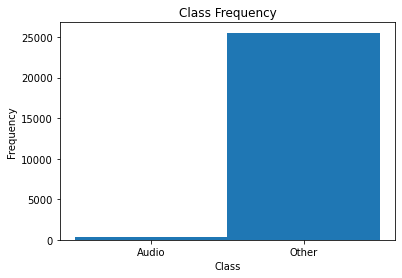

Computer Vision filtered 12164 rows


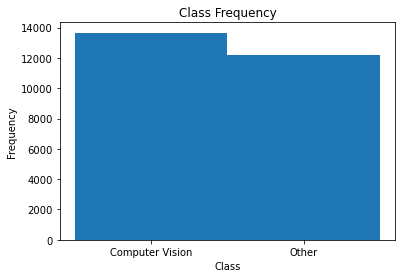

General filtered 17932 rows


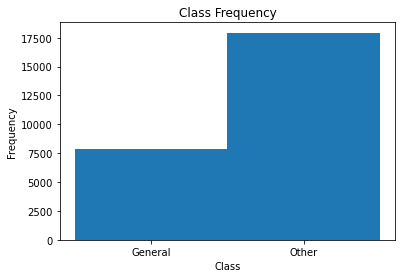

Graphs filtered 25465 rows


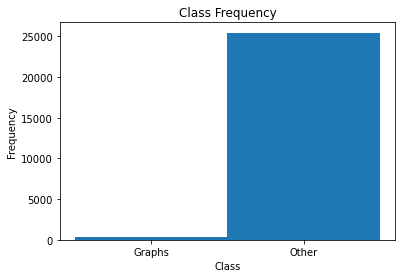

Natural Language Processing filtered 23900 rows


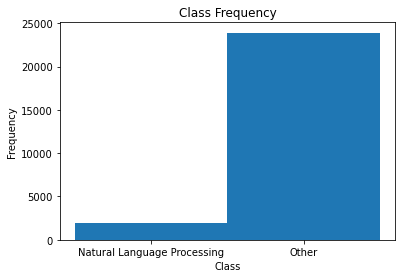

Reinforcement Learning filtered 24591 rows


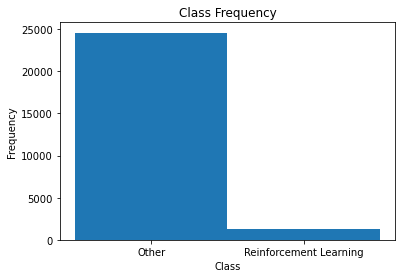

Sequential filtered 25374 rows


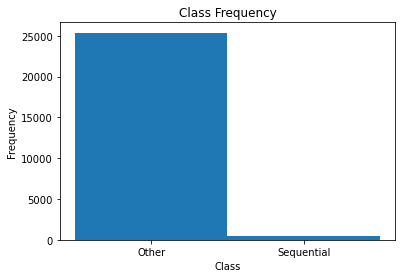

In [13]:
names_list = ["Audio", "Computer Vision", "General", "Graphs", "Natural Language Processing", "Reinforcement Learning", "Sequential"]
#names_list = ["Graphs"]
dataframecontainers_list = [DataframeContainer(name) for name in names_list]
for container in dataframecontainers_list:
    container.filter_dataframe()
    container.separate_x_y()
    container.split_train_test()

In [14]:
for container in dataframecontainers_list:
    container.clf_fit()

Audio clf fit done
Computer Vision clf fit done
General clf fit done
Graphs clf fit done
Natural Language Processing clf fit done
Reinforcement Learning clf fit done
Sequential clf fit done


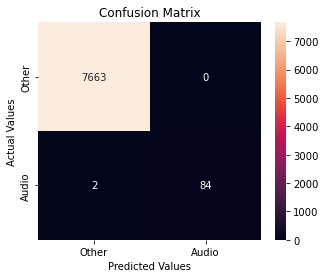

Accuracy Audio : 0.9997419021809266


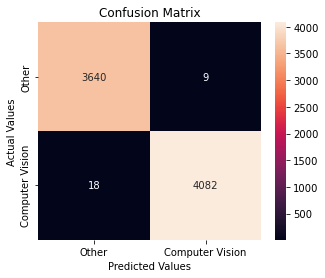

Accuracy Computer Vision : 0.9965156794425087


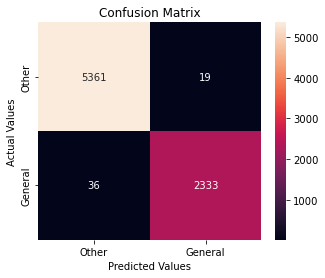

Accuracy General : 0.9929023099754807


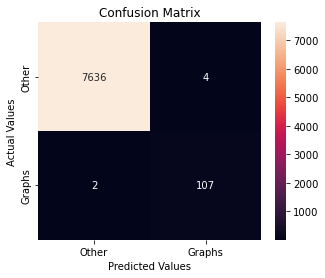

Accuracy Graphs : 0.9992257065427798


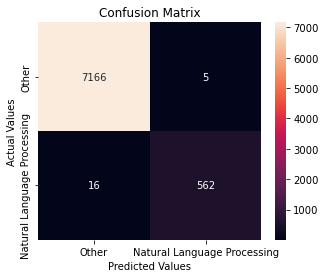

Accuracy Natural Language Processing : 0.997289972899729


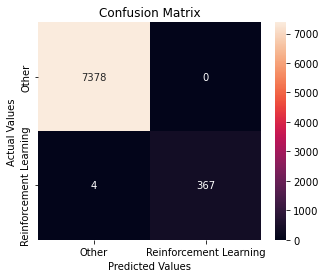

Accuracy Reinforcement Learning : 0.9994838043618531


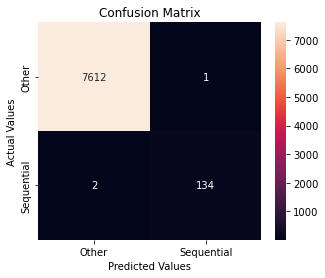

Accuracy Sequential : 0.9996128532713898


In [15]:
for container in dataframecontainers_list:
    container.predict()
    container.confusion_matrix()

In [16]:
for container in dataframecontainers_list:
    container.save_pickle()

In [17]:
def finaltest(df_train_all):
    pos = 0
    df_train_all_x = df_train_all['Text']
    for i in range(len(df_train_all_x)):
        df_train_all_x[i] = df_train_all_x[i].replace('\n', ' ').replace(',', ' ').lower()
    df_train_all_y = df_train_all['Label']
    for x in range(df_train_all_x.shape[0]):
        X = df_train_all_x.iloc[[x]]
        y = df_train_all_y.iloc[x]
        #predictions = [dataframe.clf.predict(X)[0] for dataframe in dataframecontainers_list]
        for dataframecontainer in dataframecontainers_list:
            #print(dataframecontainer.name)
            prediction = dataframecontainer.clf.predict(X)[0]
         #   p.append(prediction)
            if prediction != 'Other' and prediction == y:
                pos += 1
                break
        #print(p, y)
    print(pos/df_train_all_x.shape[0])
        
finaltest(df_train_all)

0.9969025863404057


# First try

In [18]:
df_audio = pd.read_csv('dataset/train_all.csv', sep=';')
count = 0
for ind, row in df_audio.iterrows():
    if str('Audio') != str(row['Label']):
        row['Label'] = 'Other'
        count += 1
print('Audio done', count)
        
df_cv = pd.read_csv('dataset/train_all.csv', sep=';')
count = 0
for ind, row in df_cv.iterrows():
    if str('Computer Vision') != str(row['Label']):
        count += 1
        row['Label'] = 'Other'
print('Computer vision done', count)
        
df_general = pd.read_csv('dataset/train_all.csv', sep=';')
count = 0
for ind, row in df_general.iterrows():
    if str('General') != str(row['Label']):
        row['Label'] = 'Other'
        count += 1
print('General done', count)
        
df_graphs = pd.read_csv('dataset/train_all.csv', sep=';')
count = 0
for ind, row in df_graphs.iterrows():
    if str('Graphs') != str(row['Label']):
        row['Label'] = 'Other'
        count += 1
print('Graphs done', count)
        
df_nlp = pd.read_csv('dataset/train_all.csv', sep=';')
count = 0
for ind, row in df_nlp.iterrows():
    if str('Natural Language Processing') != str(row['Label']):
        row['Label'] = 'Other'
        count += 1
print('NLP done', count)
        
df_rl = pd.read_csv('dataset/train_all.csv', sep=';')
count = 0
for ind, row in df_rl.iterrows():
    if str('Reinforcement Learning') != str(row['Label']):
        count += 1 
        row['Label'] = 'Other'
print('RL done', count)        

df_sequential = pd.read_csv('dataset/train_all.csv', sep=';')
count = 0
for ind, row in df_sequential.iterrows():
    if str('Sequential') != str(row['Label']):
        count += 1
        row['Label'] = 'Other'
print('Seqential done', count)

Audio done 25542
Computer vision done 12164
General done 17932
Graphs done 25465
NLP done 23900
RL done 24591
Seqential done 25374


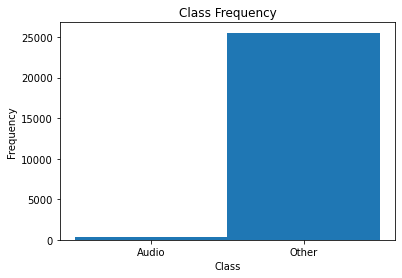

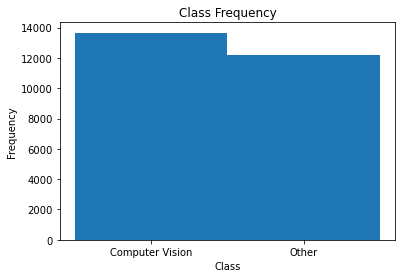

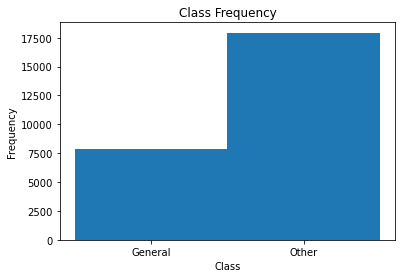

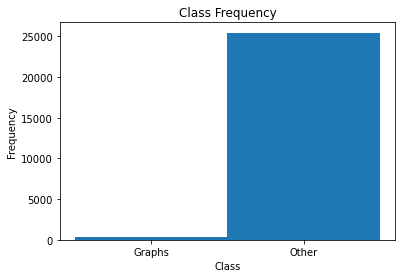

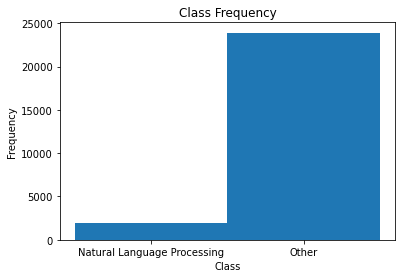

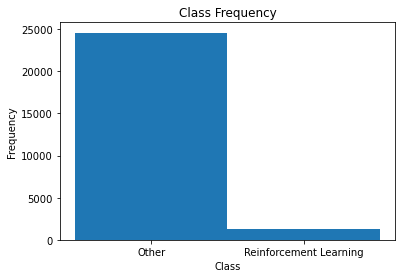

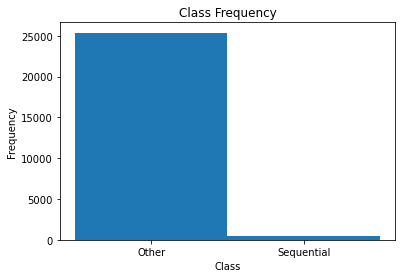

In [19]:
df_audio_x = df_audio['Text']
df_audio_y = df_audio['Label']

unique, counts = np.unique(df_audio_y , return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


df_cv_x = df_cv['Text']
df_cv_y = df_cv['Label']

unique, counts = np.unique(df_cv_y , return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


df_general_x = df_general['Text']
df_general_y = df_general['Label']

unique, counts = np.unique(df_general_y , return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


df_graphs_x = df_graphs['Text']
df_graphs_y = df_graphs['Label']

unique, counts = np.unique(df_graphs_y , return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


df_nlp_x = df_nlp['Text']
df_nlp_y = df_nlp['Label']

unique, counts = np.unique(df_nlp_y , return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


df_rl_x = df_rl['Text']
df_rl_y = df_rl['Label']

unique, counts = np.unique(df_rl_y , return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


df_sequential_x = df_sequential['Text']
df_sequential_y = df_sequential['Label']

unique, counts = np.unique(df_sequential_y , return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [20]:
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split(df_audio_x, df_audio_y, test_size=0.30, random_state=42, stratify=df_audio_y)

X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(df_cv_x, df_cv_y, test_size=0.30, random_state=42, stratify=df_cv_y)

X_general_train, X_general_test, y_general_train, y_general_test = train_test_split(df_general_x, df_general_y, test_size=0.30, random_state=42, stratify=df_general_y)

X_graphs_train, X_graphs_test, y_graphs_train, y_graphs_test = train_test_split(df_graphs_x, df_graphs_y, test_size=0.30, random_state=42, stratify=df_graphs_y)

X_nlp_train, X_nlp_test, y_nlp_train, y_nlp_test = train_test_split(df_nlp_x, df_nlp_y, test_size=0.30, random_state=42, stratify=df_nlp_y)

X_rl_train, X_rl_test, y_rl_train, y_rl_test = train_test_split(df_rl_x, df_rl_y, test_size=0.30, random_state=42, stratify=df_rl_y)

X_sequential_train, X_sequential_test, y_sequential_train, y_sequential_test = train_test_split(df_sequential_x, df_sequential_y, test_size=0.30, random_state=42, stratify=df_sequential_y)

In [21]:
clf_audio = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])
clf_audio.fit(X_audio_train, y_audio_train)
print('Audio done')


clf_cv = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])
clf_cv.fit(X_cv_train, y_cv_train)
print('CV done')


clf_general = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])
clf_general.fit(X_general_train, y_general_train)
print('General done')


clf_graphs = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])
clf_graphs.fit(X_graphs_train, y_graphs_train)
print('Graphs done')


clf_nlp = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])
clf_nlp.fit(X_nlp_train, y_nlp_train)
print('NLP done')


clf_rl = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])
clf_rl.fit(X_rl_train, y_rl_train)
print('RL done')


clf_sequential = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,
                                   max_features=None,
                                   lowercase=True)),
    #('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42))
])
clf_sequential.fit(X_sequential_train, y_sequential_train)
print('Sequential done')

Audio done
CV done
General done
Graphs done
NLP done
RL done
Sequential done


In [22]:
y_audio_pred = clf_audio.predict(X_audio_test)

y_cv_pred = clf_cv.predict(X_cv_test)

y_general_pred = clf_general.predict(X_general_test)

y_graphs_pred = clf_graphs.predict(X_graphs_test)

y_nlp_pred = clf_nlp.predict(X_nlp_test)

y_rl_pred = clf_rl.predict(X_rl_test)

y_sequential_pred = clf_sequential.predict(X_sequential_test)

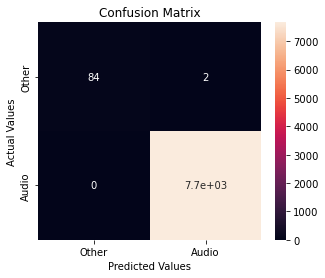

Accuracy audio :  0.9997419021809266


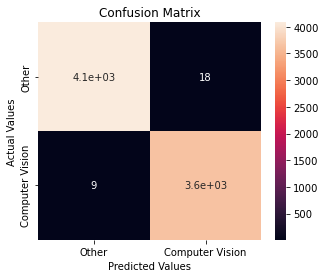

Accuracy cv :  0.9965156794425087


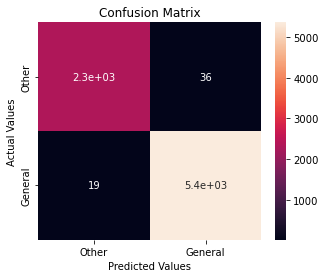

Accuracy general :  0.9929023099754807


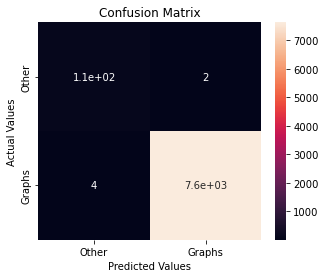

Accuracy graphs :  0.9992257065427798


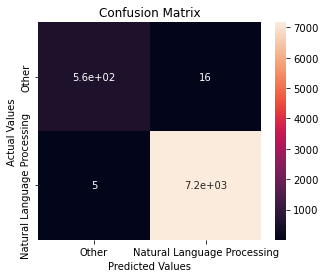

Accuracy nlp :  0.997289972899729


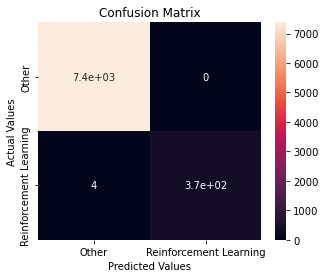

Accuracy rl :  0.9994838043618531


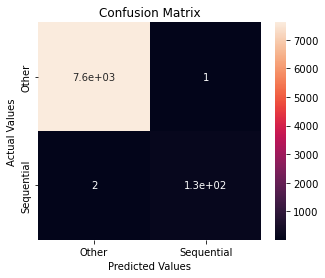

Accuracy sequential :  0.9996128532713898


In [23]:
cm = confusion_matrix(y_audio_test, y_audio_pred)
y_audio_unique = y_audio_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_audio_unique], 
                     columns = [y_audio_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("Accuracy audio : ", metrics.accuracy_score(y_audio_test, y_audio_pred))


cm = confusion_matrix(y_cv_test, y_cv_pred)
y_cv_unique = y_cv_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_cv_unique], 
                     columns = [y_cv_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("Accuracy cv : ", metrics.accuracy_score(y_cv_test, y_cv_pred))


cm = confusion_matrix(y_general_test, y_general_pred)
y_general_unique = y_general_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_general_unique], 
                     columns = [y_general_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("Accuracy general : ", metrics.accuracy_score(y_general_test, y_general_pred))


cm = confusion_matrix(y_graphs_test, y_graphs_pred)
y_graphs_unique = y_graphs_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_graphs_unique], 
                     columns = [y_graphs_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("Accuracy graphs : ", metrics.accuracy_score(y_graphs_test, y_graphs_pred))


cm = confusion_matrix(y_nlp_test, y_nlp_pred)
y_nlp_unique = y_nlp_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_nlp_unique], 
                     columns = [y_nlp_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("Accuracy nlp : ", metrics.accuracy_score(y_nlp_test, y_nlp_pred))


cm = confusion_matrix(y_rl_test, y_rl_pred)
y_rl_unique = y_rl_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_rl_unique], 
                     columns = [y_rl_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("Accuracy rl : ", metrics.accuracy_score(y_rl_test, y_rl_pred))


cm = confusion_matrix(y_sequential_test, y_sequential_pred)
y_sequential_unique = y_sequential_test.unique()
cm_df = pd.DataFrame(cm,
                     index = [y_sequential_unique], 
                     columns = [y_sequential_unique])#
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("Accuracy sequential : ", metrics.accuracy_score(y_sequential_test, y_sequential_pred))

In [24]:
pos = 0
for x in range(df_train_all_x.shape[0]):
    predictions = []
    X = df_train_all_x.iloc[[x]]
    y = df_train_all_y.iloc[x]
    predictions.append(clf_audio.predict(X)[0])
    predictions.append(clf_cv.predict(X)[0])
    predictions.append(clf_general.predict(X)[0])
    predictions.append(clf_graphs.predict(X)[0])
    predictions.append(clf_nlp.predict(X)[0])
    predictions.append(clf_rl.predict(X)[0])
    predictions.append(clf_sequential.predict(X)[0])
    for i in predictions:
        if i != 'Other':
            if i == y:
                pos += 1
                continue
print(pos/df_train_all_x.shape[0])

KeyboardInterrupt: 